# Exploratory Data Analysis

In [23]:
# import the packages
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
# load the data
df = pd.read_csv('data/train/train.csv')
breed = pd.read_csv('data/breed_labels.csv')
color = pd.read_csv('data/color_labels.csv')
state = pd.read_csv('data/state_labels.csv')
df.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

Name and Description have missing values.

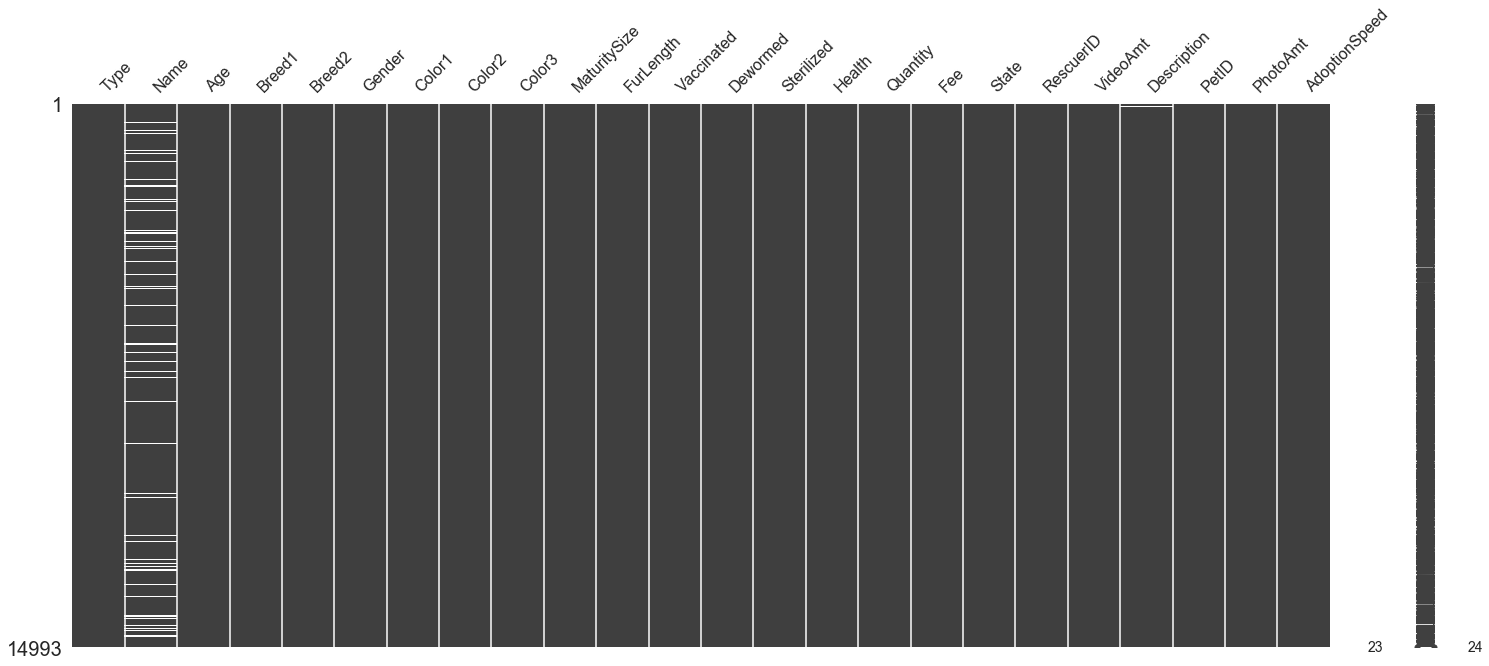

In [4]:
# check missing value
msno.matrix(df)
plt.show()

8.38% of the pets don't have names.

In [5]:
# check missing values
def check_missing(df):
    missing = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df)*100).round(2)
    missing_val = pd.concat([missing, missing_percentage], axis = 1)
    missing_val.columns = ['Missing Values', '% Missing']
    total_columns = df.shape[1]
    missing_columns = (df.isnull().sum() > 0).sum()
    print('Out of {} columns, {} columns have missing values'.format(total_columns, missing_columns))
    return missing_val

check_missing(df)

Out of 24 columns, 2 columns have missing values


,Missing Values,% Missing
Type,0,0.00
Name,1257,8.38
Age,0,0.00
Breed1,0,0.00
Breed2,0,0.00
Gender,0,0.00
Color1,0,0.00
Color2,0,0.00
Color3,0,0.00
MaturitySize,0,0.00


In [6]:
target = df[['AdoptionSpeed']]
id = df[['RescuerID', 'PetID']]
features = df.drop(['AdoptionSpeed', 'RescuerID', 'PetID'], axis=1)
num_cols = features.select_dtypes([np.number])
cat_cols = features.select_dtypes(exclude=[np.number])

In [7]:
num_cols.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000


### Target: AdoptionSpeed

The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
- 0 - Pet was adopted on the same day as it was listed.
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

Very few pets were adopted on the same day as it was listed.

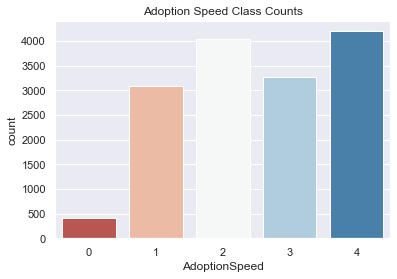

In [14]:
sns.countplot(df.AdoptionSpeed, palette='RdBu') 
plt.title('Adoption Speed Class Counts')
plt.show()

### Features

<b> Type

- 0 - Dog
- 1 - Cat

We have about 8,000 dogs and 7,000 cats in our dataset.

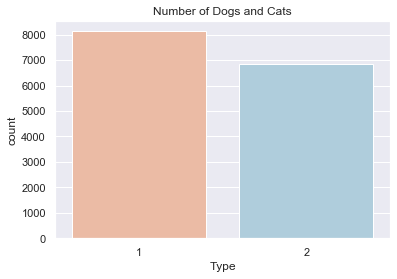

In [17]:
sns.countplot(df.Type, palette='RdBu') 
plt.title('Number of Dogs and Cats')
plt.show()

The average adoption speed of cats is faster than that of dogs.

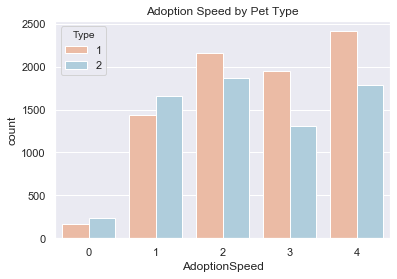

In [18]:
sns.countplot(df.AdoptionSpeed, hue=df.Type, palette='RdBu') 
plt.title('Adoption Speed by Pet Type')
plt.show()

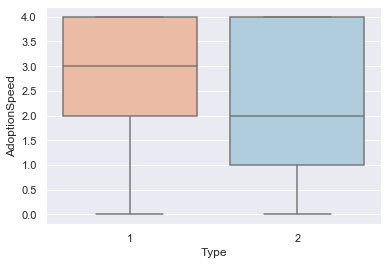

In [16]:
sns.boxplot(df.Type, df.AdoptionSpeed, palette='RdBu')
plt.show()

<b> Name

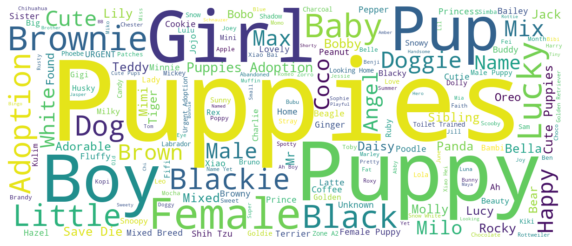

In [27]:
# generate a wordcloud image for dogs' names
dog_names = ' '.join(name for name in df.loc[df.Type==1, 'Name'] if type(name)!=float)
dog_name_wc = WordCloud(background_color='white', width=1200, height=500).generate(dog_names)

plt.figure(figsize=(10,8))
plt.imshow(dog_name_wc, interpolation='bilinear') 
_ = plt.axis('off')
plt.show()

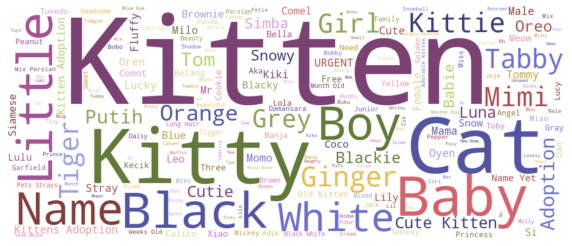

In [28]:
# generate a wordcloud image for cats' names
cat_names = ' '.join(name for name in df.loc[df.Type==2, 'Name'] if type(name)!=float)
cat_name_wc = WordCloud(background_color='white', width=1200, height=500, colormap='tab20b').generate(cat_names)

plt.figure(figsize=(10,8))
plt.imshow(cat_name_wc, interpolation='bilinear') 
_ = plt.axis('off')
plt.show()

In [ ]:
sns.boxplot(df.Type, df.AdoptionSpeed, palette='RdBu')
plt.show()

<b> Age

The distribution plot is right skewed. Most of the pets are young.

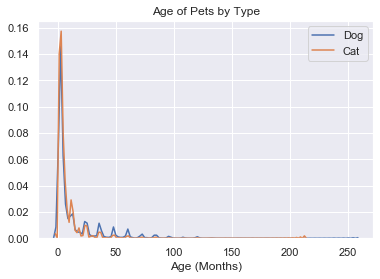

In [57]:
sns.kdeplot(df.loc[df.Type==1, 'Age'], label='Dog')
sns.kdeplot(df.loc[df.Type==2, 'Age'], label='Cat')
plt.title('Age of Pets by Type')
plt.xlabel('Age (Months)')
plt.legend()
plt.show()

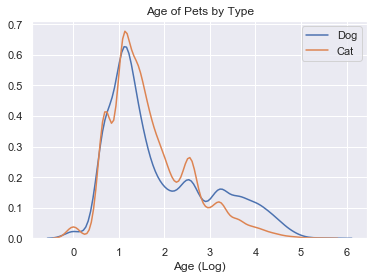

In [44]:
sns.kdeplot(np.log(df.loc[df.Type==1, 'Age']+1), label='Dog')
sns.kdeplot(np.log(df.loc[df.Type==2, 'Age']+1), label='Cat')
plt.title('Age of Pets by Type')
plt.xlabel('Age (Log)')
plt.legend()
plt.show()

The average age of the dogs and the cats in this dataset is about the same.

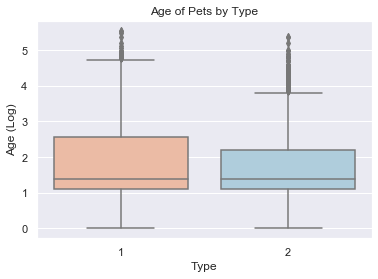

In [43]:
sns.boxplot(df.Type, np.log(df.Age+1), palette='RdBu')
plt.title('Age of Pets by Type')
plt.ylabel('Age (Log)')
plt.show()

Younger pets tend to have a faster adoption speed.

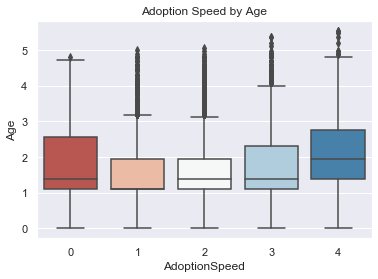

In [56]:
sns.boxplot(df.AdoptionSpeed, np.log(df.Age+1), palette='RdBu')
plt.title('Adoption Speed by Age')
plt.show()

<b> Breed

- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)

In [58]:
breed

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
...,...,...,...
302,302,2,Torbie
303,303,2,Tortoiseshell
304,304,2,Turkish Angora
305,305,2,Turkish Van


<b> Gender

Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

In this dataset, we have more females pets than male pets.

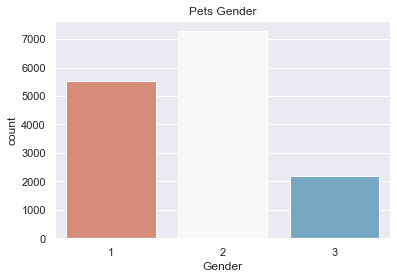

In [59]:
sns.countplot(df.Gender, palette='RdBu') 
plt.title('Pets Gender')
plt.show()

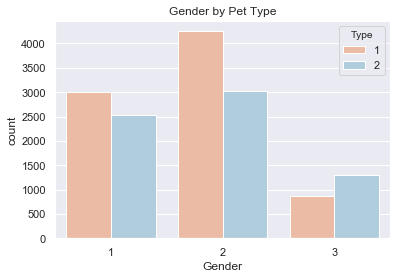

In [60]:
sns.countplot(df.Gender, hue=df.Type, palette='RdBu') 
plt.title('Gender by Pet Type')
plt.show()

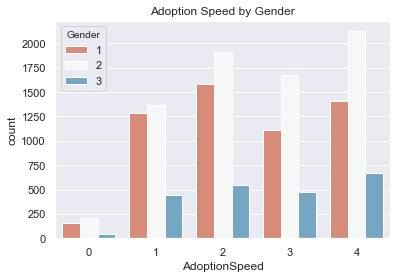

In [61]:
sns.countplot(df.AdoptionSpeed, hue=df.Gender, palette='RdBu') 
plt.title('Adoption Speed by Gender')
plt.show()